In [ ]:
!wget https://zenodo.org/records/7859211/files/metadata.zip

--2025-03-09 17:11:07--  https://zenodo.org/records/7859211/files/metadata.zip
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 836694 (817K) [application/octet-stream]
Saving to: ‘metadata.zip’

metadata.zip        100%[===================>] 817.08K   926KB/s    in 0.9s    

2025-03-09 17:11:09 (926 KB/s) - ‘metadata.zip’ saved [836694/836694]



In [ ]:
!wget https://zenodo.org/records/7859211/files/training_mixed_set.zip

--2025-03-09 17:11:09--  https://zenodo.org/records/7859211/files/training_mixed_set.zip
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9201019937 (8.6G) [application/octet-stream]
Saving to: ‘training_mixed_set.zip’

training_mixed_set. 100%[===================>]   8.57G  15.3MB/s    in 8m 49s  

2025-03-09 17:19:59 (16.6 MB/s) - ‘training_mixed_set.zip’ saved [9201019937/9201019937]



In [ ]:
!unzip training_mixed_set.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: unlabeled_set/139603_512_512.jpg  
  inflating: unlabeled_set/139604_512_512.jpg  
  inflating: unlabeled_set/139605_512_512.jpg  
  inflating: unlabeled_set/139606_512_512.jpg  
  inflating: unlabeled_set/139607_512_512.jpg  
  inflating: unlabeled_set/139608_512_512.jpg  
  inflating: unlabeled_set/139609_512_512.jpg  
  inflating: unlabeled_set/139610_512_512.jpg  
  inflating: unlabeled_set/139611_512_512.jpg  
  inflating: unlabeled_set/139612_512_512.jpg  
  inflating: unlabeled_set/139613_512_512.jpg  
  inflating: unlabeled_set/139614_512_512.jpg  
  inflating: unlabeled_set/139615_512_512.jpg  
  inflating: unlabeled_set/139616_512_512.jpg  
  inflating: unlabeled_set/139617_512_512.jpg  
  inflating: unlabeled_set/139618_512_512.jpg  
  inflating: unlabeled_set/139619_512_512.jpg  
  inflating: unlabeled_set/139620_512_512.jpg  
  inflating: unlabeled_set/139621_512_512.jpg  
  inflating: unlabeled_set/139622_512_

In [ ]:
!unzip metadata.zip

Archive:  metadata.zip
   creating: metadata/
 extracting: metadata/envs_mapping.txt  
  inflating: metadata/labels_mapping.txt  
  inflating: metadata/test_frames_labels.csv  
  inflating: metadata/test_set_frames_envs.csv  
  inflating: metadata/training_mixed_frames_labels.csv  
  inflating: metadata/training_mixed_set_frames_envs.csv  
  inflating: metadata/training_set_frames_envs.csv  
  inflating: metadata/validation_set_frames_envs.csv  


In [ ]:
import pandas as pd

data_df = pd.read_csv("metadata/training_mixed_frames_labels.csv")
data_df.head()

,frame_id,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [ ]:
data_df["frame_id"] = data_df["frame_id"].astype(str)
for i,name in enumerate(data_df["frame_id"]):
  data_df.loc[i,"frame_id"] = "unlabeled_set/"+ (name).zfill(6) + "_512_512.jpg"
  # labels["frame_id"].iloc[i] = str(name).zfill(6)
data_df["label"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20,  0])

In [ ]:
data_df["label"] = data_df["label"].astype(str)
for i,lab in enumerate(data_df["label"]):
  if lab == str(0):
    data_df.loc[i,"label"] = "Normal"
  else:
     data_df.loc[i,"label"] = "Anomaly"

In [ ]:
data_df.head()

,frame_id,label
0,unlabeled_set/000000_512_512.jpg,Anomaly
1,unlabeled_set/000001_512_512.jpg,Anomaly
2,unlabeled_set/000002_512_512.jpg,Anomaly
3,unlabeled_set/000003_512_512.jpg,Anomaly
4,unlabeled_set/000004_512_512.jpg,Anomaly


# **DATA IMPORT AND DATASET POPULATION**

### Data import

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
#General libraries import
import tensorflow as tf
import keras
import numpy as np
import os.path

### Dataset population ###

In [ ]:
data_df['label'].value_counts(normalize=True)

,proportion
label,
Anomaly,0.652559
Normal,0.347441


In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the image_df into training and validation dataframe, shuffling the data and maitaining the ratio between classes
train_df, val_df = train_test_split(data_df, test_size=0.2, shuffle=True, random_state=42)
train_df, test_df = train_test_split(train_df, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
train_df['label'].value_counts(normalize=True)

,proportion
label,
Anomaly,0.652714
Normal,0.347286


In [ ]:
import tensorflow as tf

img_size = (512,512)

#Instantiating an ImageDataGenerator class used for training and validation with the augmentation and the preprocessing function
datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
                           rotation_range=10,
                           horizontal_flip='True')
#Instantiating an ImageDataGenerator class used for test with only the preprocessing function
testgen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

#Calling the method flow_from_dataframe to have a DataFrameIterator containing batch images and labels for each set
train_images = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='frame_id',
    y_col='label',
    target_size=(512,512),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=21
    )

val_images = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='frame_id',
    y_col='label',
    target_size=(512,512),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=21
)

test_images = testgen.flow_from_dataframe(
    dataframe=test_df,
    x_col='frame_id',
    y_col='label',
    target_size=(512,512),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 104113 validated image filenames belonging to 2 classes.
Found 28921 validated image filenames belonging to 2 classes.
Found 11569 validated image filenames belonging to 2 classes.


### Data visualization ###

In [ ]:
#We extract a batch of images to visualize them
image, label = next(iter(train_images))

In [ ]:
#Creating a sequential model to rescale images into [0,1] range in order to be visualized
from keras import layers
rescale = tf.keras.Sequential([
  layers.Rescaling(1,offset=+1),
  layers.Rescaling(1./2)
])

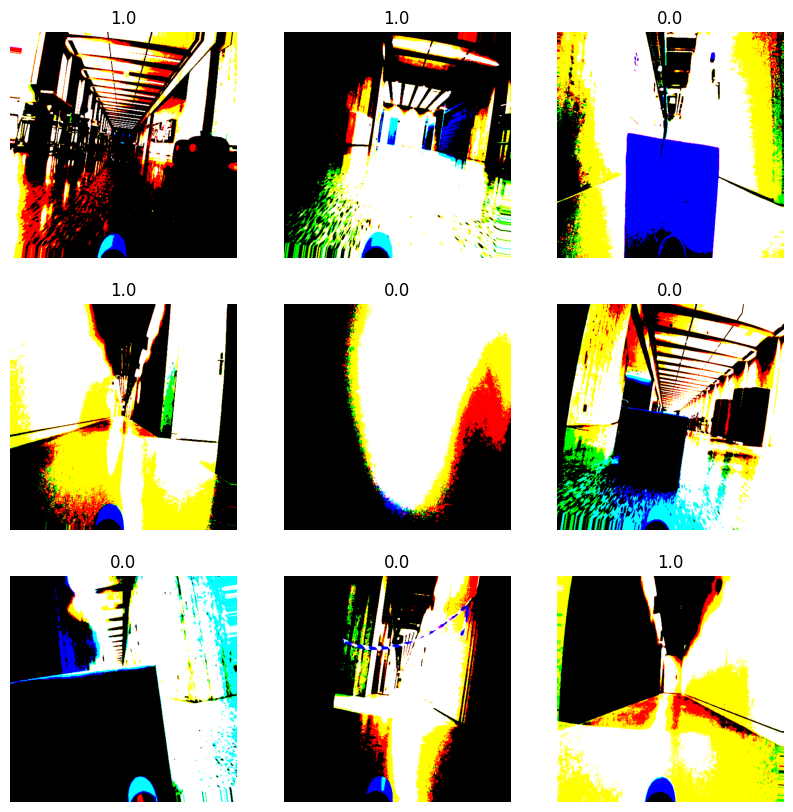

In [ ]:
#Here are going to be displayed 9 images from the batch previously extracted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
  im = rescale(image[i])
  ax = plt.subplot(3, 3, i + 1)
  ax.set_title(label[i])
  plt.imshow(im)
  plt.axis("off")

# **MODEL DEFINITION AND TRAINING**

### Model Definition

In [ ]:
#Loading the pretrained model
base_model = keras.applications.VGG19(
    input_shape=(512, 512, 3), #Input shape preferable for MobileNetV2
    include_top=False,  #Not including the densely connected classifier
    weights='imagenet'
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#Freezing all the weights of the base convolutional model
base_model.trainable = False

In [ ]:
#Defining a function to build the model from functional API
from keras import layers
def build_model():

  input = layers.Input(shape=(512,512,3))
  x = base_model(input, training=False)
  x = layers.GlobalAveragePooling2D()(x)
  output = layers.Dense(1, activation='sigmoid')(x)
  model = keras.Model(inputs=input,outputs=output)
  return model

In [ ]:
#Building the model and visualizing its summary
model = build_model()
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 16, 16, 512)         │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,024,897 (76.39 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
#Plotting the model
# tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#Callbacks for the model training
from datetime import datetime
name = datetime.now().strftime("AD_Loop_%d_%m_%Y_%H_%M_%S.keras")
callbacks = [
    #ModelCheckpoint will save only the best model respect to "val_loss" value into the "name" model
    keras.callbacks.ModelCheckpoint(
        filepath=name,
        verbose=1,
        save_best_only=True,
        monitor="val_loss"),
    # EarlyStopping will stop the training after 5 epochs with no improvement on the "val_loss" value
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    )
]

In [ ]:
from keras.optimizers import Adam
#Compiling the model using binary crossentropy as loss function, Adam as optimizer and using Accuracy, Precision and Recall as metrics
model.compile(
      optimizer = "Adam",
      loss='binary_crossentropy',
      metrics=['Precision','Recall','accuracy']
      )

### Initial Training

In [ ]:
#Training of the model on maximium 20 epochs
history = model.fit(train_images,
                    epochs=3,
                    validation_data=val_images,
                    callbacks=callbacks
                    )

Epoch 1/3
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - Precision: 0.7970 - Recall: 0.8256 - accuracy: 0.8702 - loss: 0.2956
Epoch 1: val_loss improved from inf to 0.16100, saving model to AD_Loop_09_03_2025_17_28_10.keras
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 9411s 3s/step - Precision: 0.7970 - Recall: 0.8256 - accuracy: 0.8702 - loss: 0.2955 - val_Precision: 0.8591 - val_Recall: 0.9753 - val_accuracy: 0.9359 - val_loss: 0.1610
Epoch 2/3
1961/3254 ━━━━━━━━━━━━━━━━━━━━ 50:10 2s/step - Precision: 0.8997 - Recall: 0.9510 - accuracy: 0.9462 - loss: 0.1435

In [ ]:
!mv {name} drive/MyDrive/

In [ ]:
np.save('history.npy',history.history)

In [ ]:
import numpy as np
history=np.load('drive/MyDrive/DS/history.npy',allow_pickle='TRUE').item()
#Saving the initial training accuracy and loss on training and validation data
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

precision = history['precision']
val_precision = history['val_precision']

recall = history['recall']
val_recall = history['val_recall']

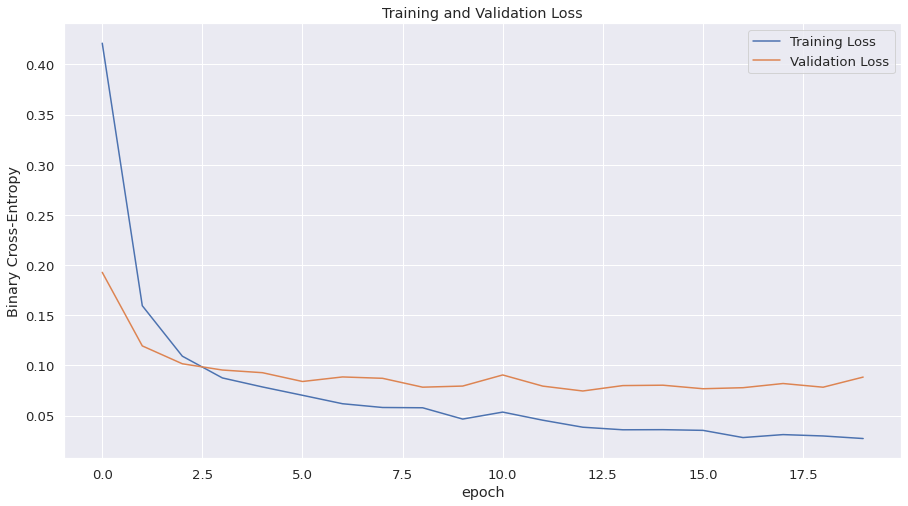

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Binary Cross-Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine-tuning of the base_model

In [ ]:
#Unfreezing the last 11 layers of the base_model which correspond to the last convolutional block
base_model.trainable = False
base_model.trainable = True
for layer in base_model.layers[:-11]:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_7   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 887,361
Non-trainable params: 1,371,904
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
#Compiling the model for the fine-tuning phase, using the same parameters as the first training but decreasing the learning rate of the optimizer
model.compile(
      optimizer = Adam(learning_rate=1e-8),
      loss='binary_crossentropy',
      metrics=['Precision','Recall','accuracy']
      )

In [ ]:
#Fine tuning
fthistory = model.fit(train_images,
                    epochs=20+10,
                    initial_epoch=20,
                    validation_data=val_images,
                    callbacks = callbacks
                    )

Epoch 21/30
23/23 [==============================] - ETA: 0s - loss: 0.0219 - precision: 0.9945 - recall: 0.9890 - accuracy: 0.9959
Epoch 21: val_loss did not improve from 0.07188
23/23 [==============================] - 39s 2s/step - loss: 0.0219 - precision: 0.9945 - recall: 0.9890 - accuracy: 0.9959 - val_loss: 0.0863 - val_precision: 0.9545 - val_recall: 0.9333 - val_accuracy: 0.9727
Epoch 22/30
23/23 [==============================] - ETA: 0s - loss: 0.0208 - precision: 0.9836 - recall: 0.9890 - accuracy: 0.9932
Epoch 22: val_loss did not improve from 0.07188
23/23 [==============================] - 76s 3s/step - loss: 0.0208 - precision: 0.9836 - recall: 0.9890 - accuracy: 0.9932 - val_loss: 0.0868 - val_precision: 0.9762 - val_recall: 0.9111 - val_accuracy: 0.9727
Epoch 23/30
23/23 [==============================] - ETA: 0s - loss: 0.0212 - precision: 0.9890 - recall: 0.9890 - accuracy: 0.9946
Epoch 23: val_loss did not improve from 0.07188
23/23 [==============================]

In [ ]:
np.save('fthistory.npy',fthistory.history)

In [ ]:
#Adding the fine-tuning phase values to the initial training
fthistory=np.load('drive/MyDrive/DS/fthistory.npy',allow_pickle='TRUE').item()
acc += fthistory['accuracy']
val_acc += fthistory['val_accuracy']

loss += fthistory['loss']
val_loss += fthistory['val_loss']

precision += fthistory['precision']
val_precision += fthistory['val_precision']

recall += fthistory['recall']
val_recall += fthistory['val_recall']

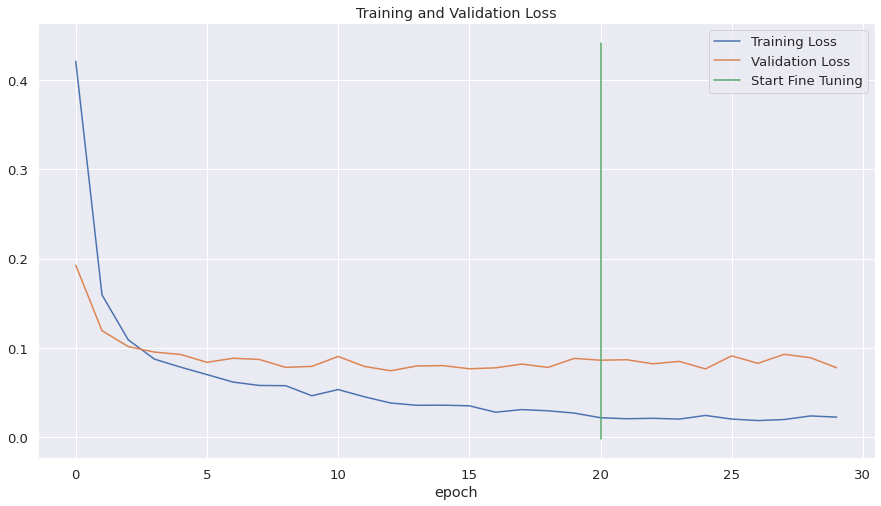

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([20,20],
plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# METRICS EVALUATION

### KFold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model
#Instantiatin a Stratifield KFold cross validation class on 5 splits
skf = StratifiedKFold(n_splits=5)
#Divinding the main dataframe into two colums: one with filepaths and one with labels
X=image_df.drop('Label', axis=1)
y=image_df.Label
fold_num=0
results = []

#For loop for iterating over each fold combination
for train_index, val_index in skf.split(X, y):
    fold_num += 1
    #Creating training and test labels and filepaths using the indexes provided from the split method of the StratifiedKFold class
    X_train, X_test = X.iloc[train_index], X.iloc[val_index]
    y_train, y_test = y.iloc[train_index], y.iloc[val_index]

    #Concatenate labels and filepaths to create dataframes for training and validation
    Ktrain = pd.concat([X_train,y_train], axis=1)
    Kval = pd.concat([X_test,y_test], axis=1)

    #Printing the Frequency count of each class in the training and validation dataframes to check if it is equal to the original one
    print("\n***Frequency of classes in the fold***\n")
    print(Ktrain['Label'].value_counts(normalize=True))
    print(Kval['Label'].value_counts(normalize=True))
    print("\n")

    #Using the ImageDataGenerator as above to create DataFrameIterators from dataframes
    datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
                               rotation_range=10,
                               horizontal_flip='True')

    train_images = datagen.flow_from_dataframe(dataframe=Ktrain,
                                               x_col='Filepath',
                                               y_col='Label',
                                               target_size=(224, 224),
                                               color_mode='rgb',
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42
                                               )

    val_images = datagen.flow_from_dataframe(dataframe=Kval,
                                             x_col='Filepath',
                                             y_col='Label',
                                             target_size=(224, 224),
                                             color_mode='rgb',
                                             class_mode='binary',
                                             batch_size=32,
                                             shuffle=True,
                                             seed=42
                                             )

    print("\nTrain for fold", fold_num)
    #Building the model and callbacks for each model
    kmodel=build_model()
    base_model.trainable = False
    name = datetime.now().strftime("kfold_%d_%m_%Y_%H_%M_%S.keras")

    kcallbacks = [keras.callbacks.ModelCheckpoint(filepath=name,
                                                  verbose=1,
                                                  save_best_only=True,
                                                  monitor="val_loss")
    ]
    kmodel.compile(optimizer = "Adam",
                   loss='binary_crossentropy',
                   metrics=['Precision','Recall','accuracy']
                   )

    #Training the model on 4 folds and validating on the remaining one
    khistory = kmodel.fit(train_images,
                          epochs=10,
                          validation_data=val_images,
                          callbacks = kcallbacks
                          )

    #Evaluating the performance of the model on the validation data
    print("***Performance on Validation data***")
    kmodel=load_model(name)
    #Saving the performances of the model into the results variable
    results.append(kmodel.evaluate(val_images))


***Frequency of classes in the fold***

fire_images        0.752381
non_fire_images    0.247619
Name: Label, dtype: float64
fire_images        0.755435
non_fire_images    0.244565
Name: Label, dtype: float64


Found 735 validated image filenames belonging to 2 classes.
Found 184 validated image filenames belonging to 2 classes.

Train for fold 1
Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.3826 - precision: 0.9294 - recall: 0.4341 - accuracy: 0.8517
Epoch 1: val_loss improved from inf to 0.15435, saving model to kfold_15_03_2023_09_10_36.keras
23/23 [==============================] - 47s 2s/step - loss: 0.3826 - precision: 0.9294 - recall: 0.4341 - accuracy: 0.8517 - val_loss: 0.1543 - val_precision: 0.9302 - val_recall: 0.8889 - val_accuracy: 0.9565
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.1234 - precision: 0.9758 - recall: 0.8846 - accuracy: 0.9660
Epoch 2: val_loss improved from 0.15435 to 0.07933, saving model to kfold_15_03_20

In [ ]:
np.save("kfoldres",results)

In [ ]:
results = np.load('drive/MyDrive/DS/kfoldres.npy',allow_pickle='TRUE')

In [ ]:
#Calculating the mean metrics by summing all the values and then diving by 5
metrics = np.sum(results, axis=0)/5

In [ ]:
print("Mean Loss among 5 folds = ", metrics[0])
print("Mean Precision among 5 folds = ", metrics[1])
print("Mean Recall among 5 folds = ", metrics[2])
print("Mean Accuracy among 5 folds = ", metrics[3])

Mean Loss among 5 folds =  0.06430950239300728
Mean Precision among 5 folds =  0.9775757551193237
Mean Recall among 5 folds =  0.9383574962615967
Mean Accuracy among 5 folds =  0.979318130016327


### Fine tuned model metrics

In [ ]:
from keras.models import load_model
model = load_model("drive/MyDrive/DS/fire_15_03_2023_10_04_22.keras")

In [ ]:
model.evaluate(test_images)
#Prediction of the model on the test set
preds= model.predict(test_images)
#iterating all the predictions to round probability and have the number of the class in y_preds
y_preds = [int(round(p[0])) for p in preds]

3/3 [==============================] - 4s 834ms/step


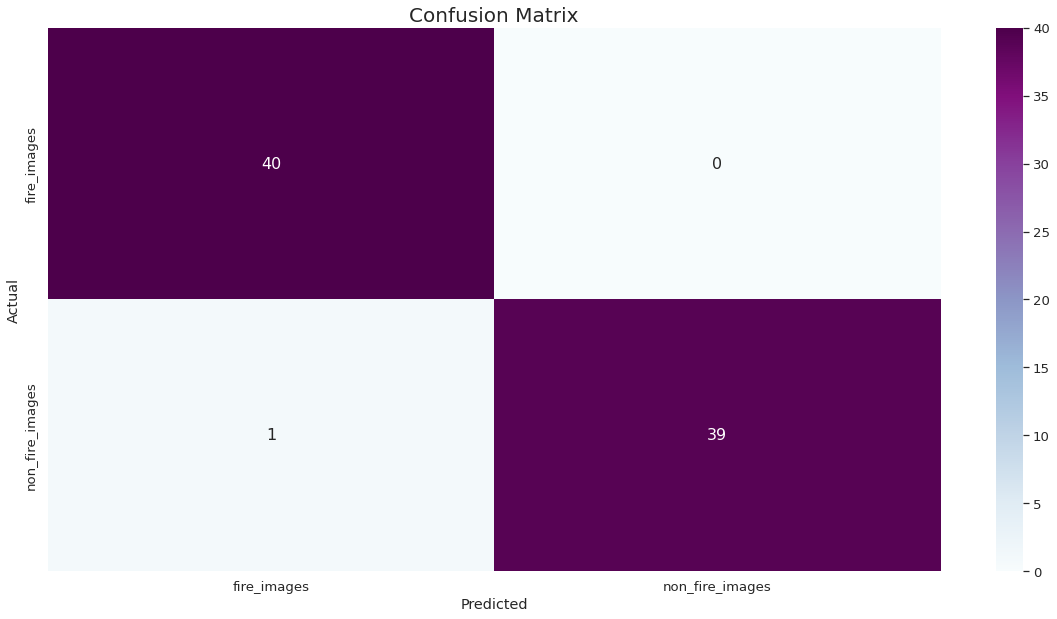

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import plotly.express as px

#Plotting the confusion matrix using test_images.class as the actual labels and y_preds as Predicted ones
classes=image_df['Label'].unique()

cm_data = confusion_matrix(test_images.classes , y_preds)
cm = pd.DataFrame(cm_data, columns=classes, index = classes)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=True, cmap="BuPu", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
#Classification report of the model
print(classification_report(test_images.classes, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.97      0.99        40

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

